In [1]:
# Set path variables
import os
import sys

cwd = os.getcwd()
project_dir = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.append(project_dir)

data_path = os.path.join(project_dir, 'data/')
print(project_dir)
print(data_path)

/home/yuzh/Tagging-Music-Sequences
/home/yuzh/Tagging-Music-Sequences/data/


In [ ]:
# for data loading process
from src.data_loader import *
import pandas as pd
from IPython.display import Audio

# load your libraries here


# Modeling (Adjust to whatever model you want to do)

## Data loading

In [60]:
# Load label annotation csv
train_annotations = pd.read_csv(data_path + 'train_label.csv', index_col=0).reset_index(drop=True)
val_annotations = pd.read_csv(data_path + 'val_label.csv', index_col=0).reset_index(drop=True)
test_annotations = pd.read_csv(data_path + 'test_label.csv', index_col=0).reset_index(drop=True)

# Instantiate datasets from our dataset class
output = 'waveform' # use 'mel_spec' for mel spectrograms with decibals
train_data = AudioDS(train_annotations, data_path, output=output)
val_data = AudioDS(val_annotations, data_path, output=output)
test_data = AudioDS(test_annotations, data_path, output=output)

In [61]:
# Load data from created datasets
batch_size = 64

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=False)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [62]:
train_annotations.head(100)

,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,soft,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,mtat/3/vito_paternoster-inzaffirio-09-preludio...
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,mtat/2/roots_of_rebellion-surfacing-08-so_far_...
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,mtat/e/briddes_roune-lenten_is_come-04-the_mil...
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,mtat/1/suzanne_teng-mystic_journey-08-clouds_a...
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,mtat/a/yongen-yello_haus-08-shackles_of_gold-3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,mtat/a/falik-dreams_from_the_machine-03-inner_...
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,mtat/c/edward_martin-art_of_the_lute_in_renais...
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,mtat/8/stargarden-music_for_modern_listening-1...
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,mtat/f/magnatune-relaxation_spa-12-northeaster...


In [63]:
# Display batch information
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 480000])
Labels batch shape: torch.Size([64, 134])


In [64]:
# Retrieve a sample
idx = 9
waveform = train_features[idx]
label = train_labels[idx]
decoded_labels = train_data.decode_labels(label)
file_path = train_data.get_filepath(idx)

print(f"Audio file path: {file_path}")
print(f"Label: {label}")
print(f"Decoded labels: {decoded_labels}")

Audio file path: /Users/ab/Projects/Tagging-Music-Sequences/data/mtat/3/very_large_array-stuff-10-psychedelic_baby-204-233.mp3
Label: tensor([ True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,  True,
        

In [65]:
# shape of waveform
# first element: number of channels in our case 1
# second element: number of samples in 30 seconds audio 
# -> 480000 = 30s * 16000 samples/s
waveform.shape

torch.Size([1, 480000])

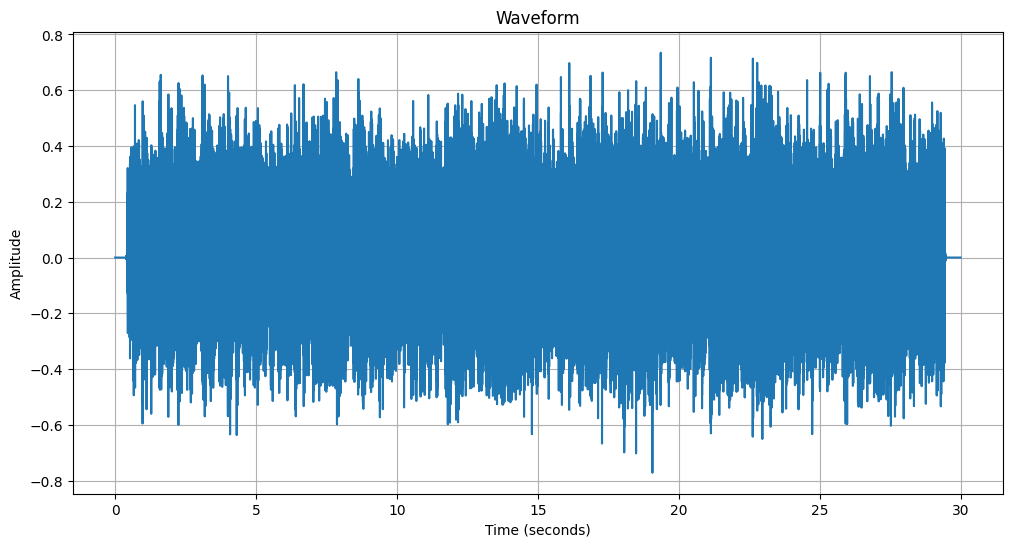

In [66]:
AudioPlot.plot_waveform(waveform, sample_rate=train_data.sample_rate)

In [67]:
Audio(file_path)